In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv (r"C:\Users\Lenovo\Desktop\DS\Project\mushrooms.csv.txt")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.shape

(8124, 23)

In [4]:
#encode data since all the columns had objects
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
for col in data.columns:
    data[col] = lab_enc.fit_transform(data[col])
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [5]:
#Check for null data
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

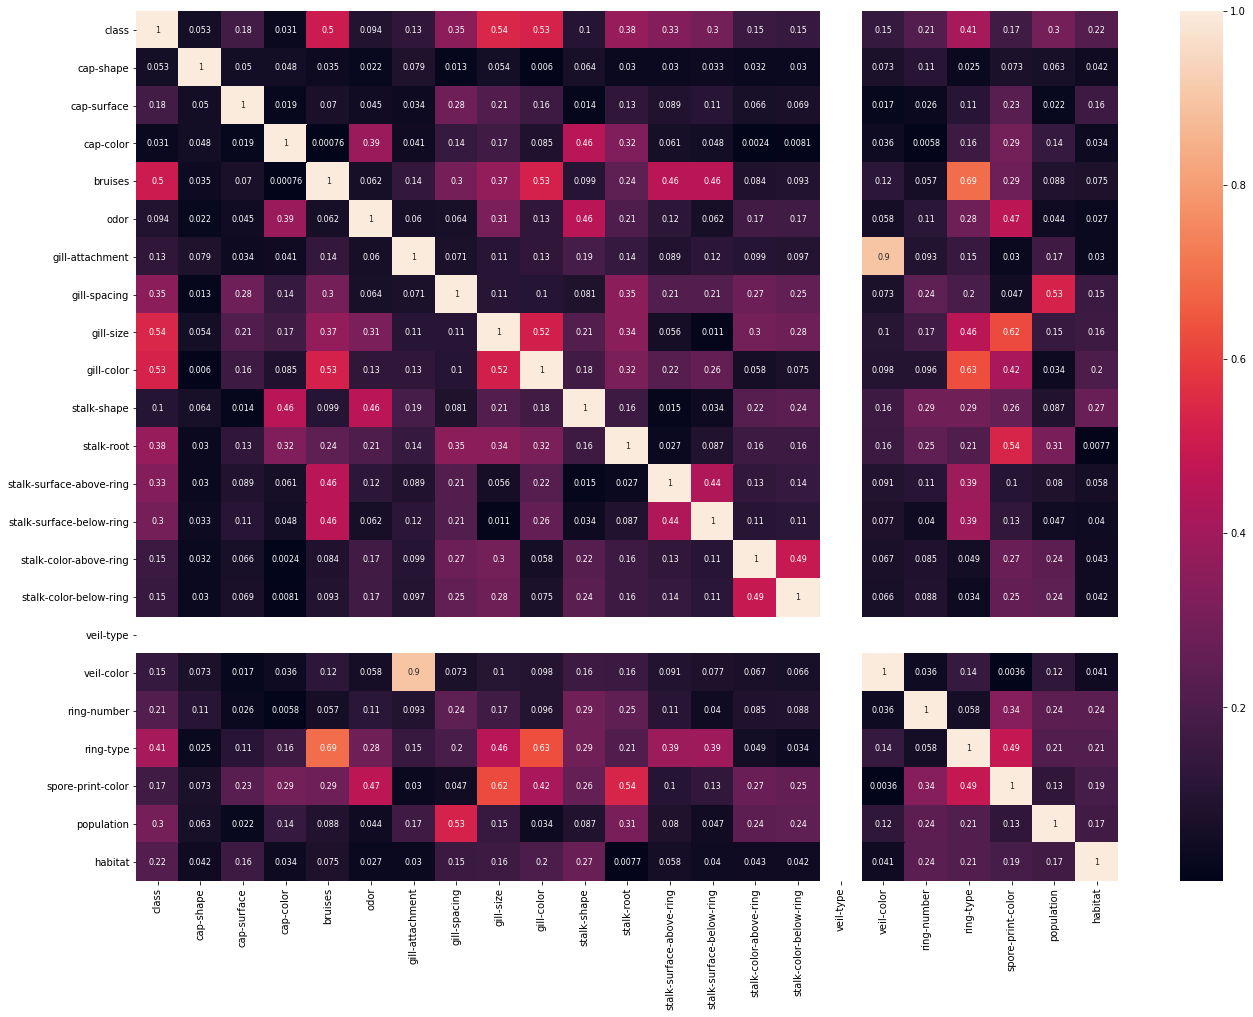

In [6]:
#Check for collinearity
df_corr = data.corr().abs()
plt.figure (figsize = (22,16))
sns.heatmap(df_corr,annot = True, annot_kws = {'size':8}) 
plt.show

In [7]:
#removed, veil-color since it is collinear with gill-attachment (Didn't confirm collinearity because there are more features)
data = data.drop(columns = ['veil-type','veil-color'])

In [8]:
#model building
x = data.drop (columns = ['class'])
y = data['class']

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\ana

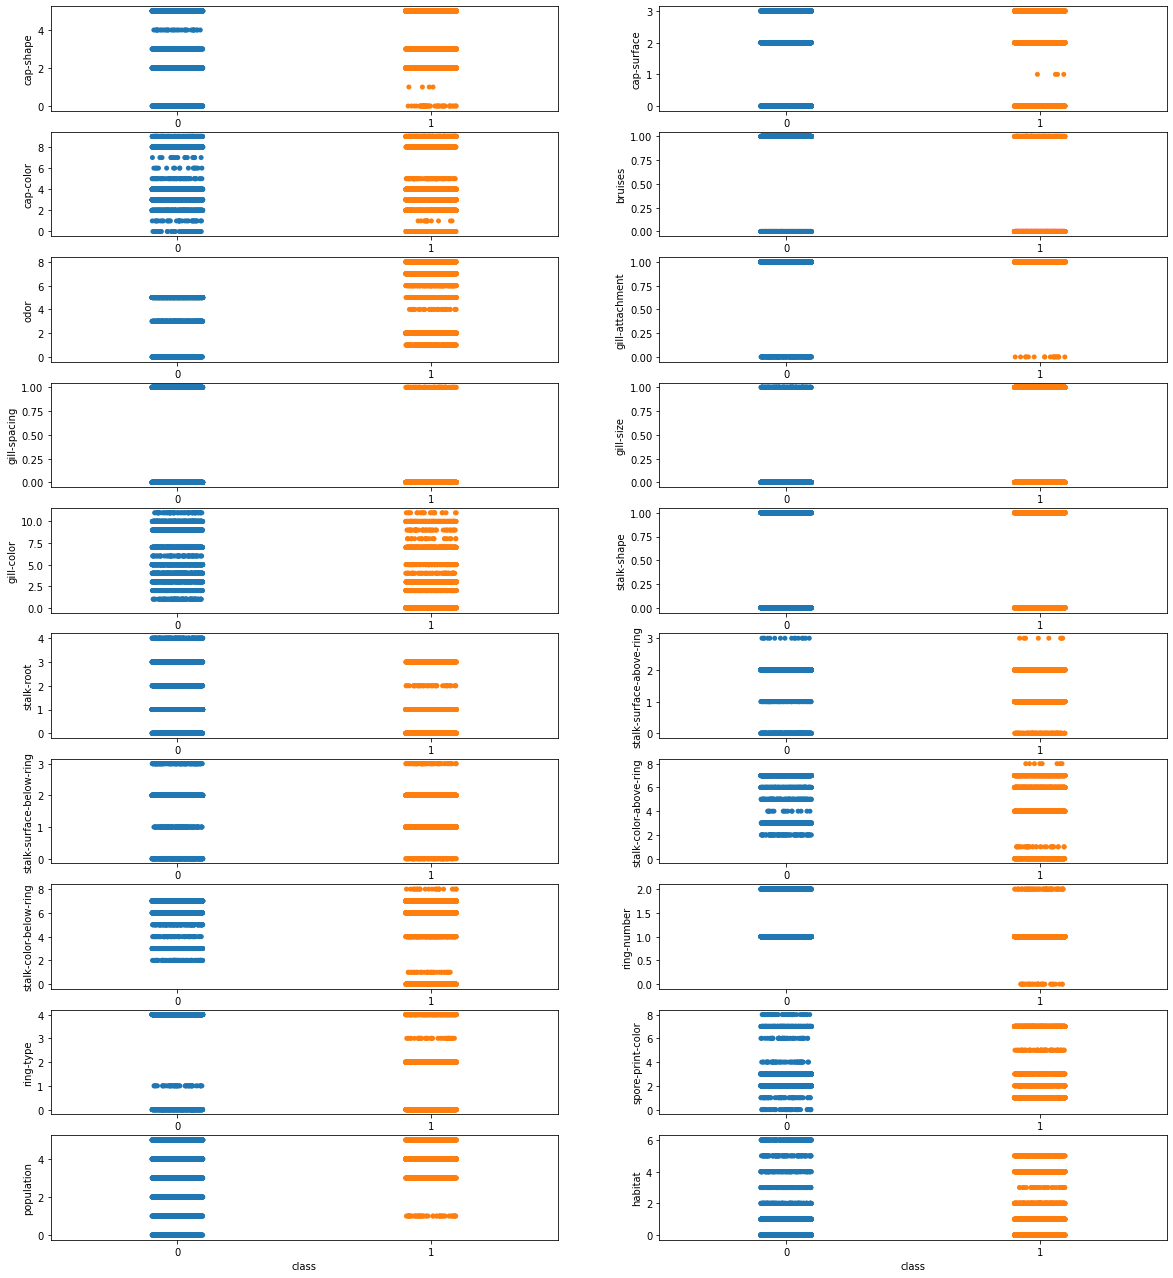

In [9]:
#Checking the relationship of the features with label
plt.figure(figsize = (20,25))
plotnumber = 1
for column in x:
    if plotnumber<=22:
        ax = plt.subplot(11,2,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber +=1
plt.show()

In [10]:
x_train,x_test,y_train,y_test = train_test_split (x,y,test_size = 0.25,random_state = 100)
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
y_pred = log_reg.predict(x_test)

In [12]:
#Confusion matrix
conf_mat = confusion_matrix (y_test,y_pred)
print ('Confusion matrix\n:', conf_mat)

Confusion matrix
: [[999  45]
 [ 61 926]]


In [13]:
#Accuracy score
t_p = conf_mat [0][0]
f_p = conf_mat [0][1]
f_n = conf_mat [1][0]
t_n = conf_mat [1][1]
accuracy = (t_p + t_n)/(t_p+f_p+f_n+t_n)
print ('Accuracy:\n',accuracy)

Accuracy:
 0.947808961102905


In [14]:
#Classification report
class_report = classification_report (y_test,y_pred)
print('Classification report:\n', class_report)

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1044
           1       0.95      0.94      0.95       987

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031

